Successfully loaded experiment configuration:
{
  "EXPERIMENT_NAME": "ResNet18_MNIST_200epochs_Final",
  "SNAPSHOT_DIR": "snapshots/mnist/resnet18",
  "ARCHITECTURE_NAME": "resnet18",
  "DATASET_NAME": "MNIST",
  "CLASSES_TO_USE": "all",
  "N_EPOCHS": 200,
  "BATCH_SIZE": 128,
  "TRAIN_LR": 0.01,
  "SCHEDULER_PATIENCE": 5,
  "SCHEDULER_FACTOR": 0.5,
  "PD_SAMPLE_SIZE": 512,
  "PD_MAX_EDGE_LENGTH": 30.0,
  "NC_SAMPLE_SIZE": 5000,
  "SAVE_MODEL_HISTORY": false
}
Looked up number of classes for 'MNIST': 10
Successfully loaded history log.


,train_loss,train_acc,test_loss,test_acc,nc1_pinv,nc1_svd,nc1_quot,nc1_cdnv,nc2_etf_err,nc2g_dist,nc2g_log,face_variance_collapse_Cm,learning_rate
epoch,,,,,,,,,,,,,
0,NaN,NaN,2.476865,9.89,2.541357,2.541355,4.324795,5.237047,1.083228,0.164479,0.105481,-2.541357,NaN
1,0.199612,93.813333,0.037416,98.89,0.148689,0.148689,0.238223,0.117535,0.681734,0.030384,0.014026,-0.148689,0.01
2,0.026126,99.228333,0.033303,98.89,0.134181,0.134181,0.225016,0.109250,0.621394,0.026602,0.012472,-0.134181,0.01
3,0.012618,99.698333,0.019464,99.35,0.119870,0.119870,0.206688,0.097953,0.541660,0.018258,0.008126,-0.119870,0.01
4,0.005143,99.921667,0.019610,99.30,0.109527,0.109527,0.190650,0.090133,0.546657,0.018160,0.008133,-0.109527,0.01


Topological measures calculated and merged successfully.


,m_sep,m_tight,m_ratio
epoch,,,
0,4.021081,2.745421,0.682757
1,8.218176,4.933310,0.600293
2,7.998082,4.748366,0.593688
3,8.143057,4.730922,0.580976
4,8.818622,4.835383,0.548315


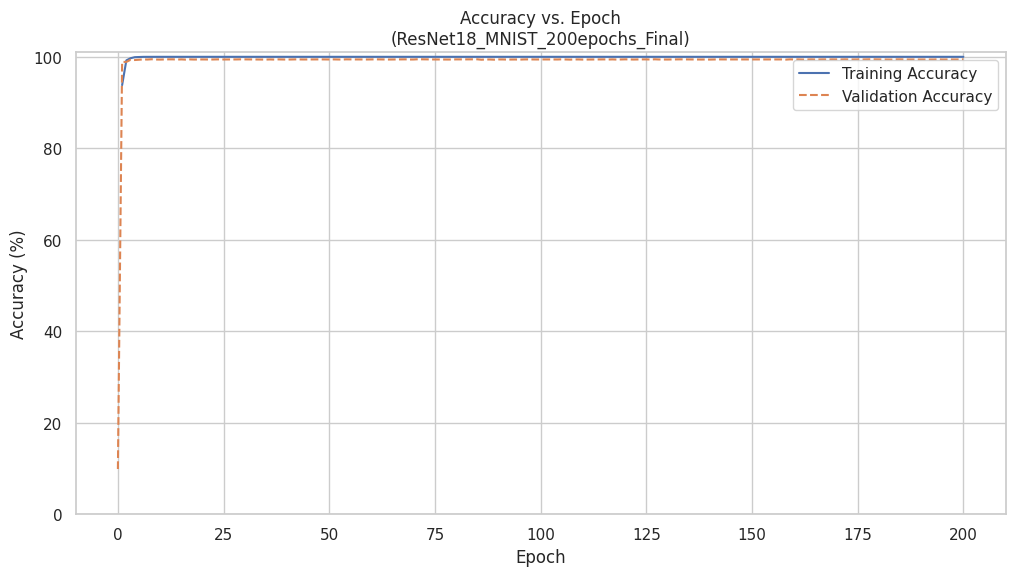

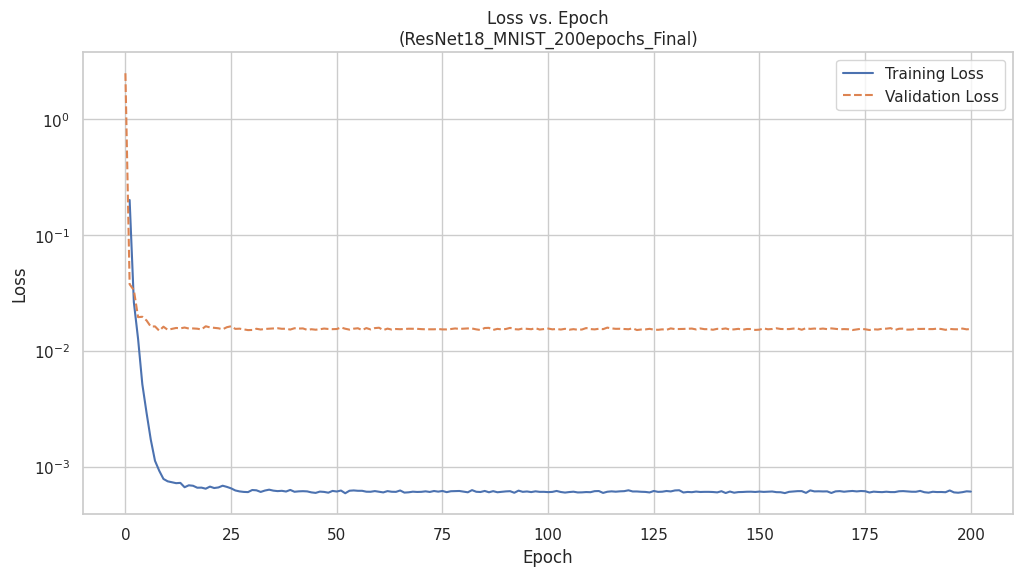

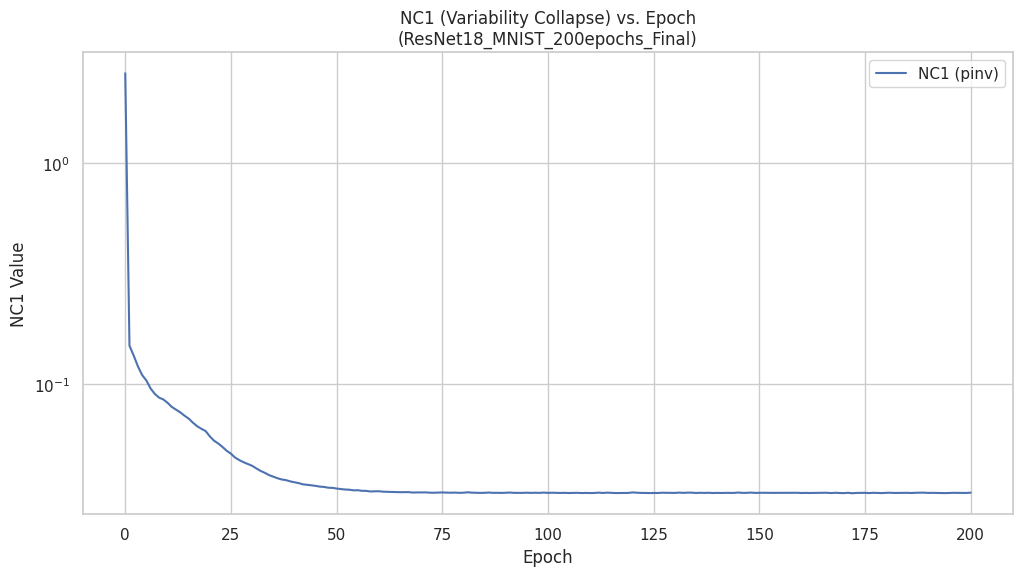

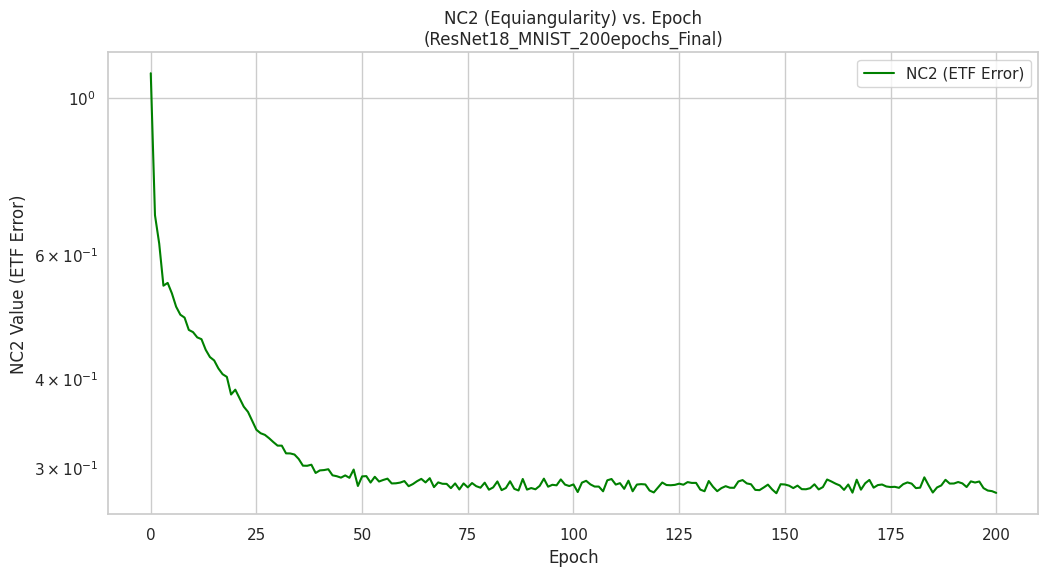

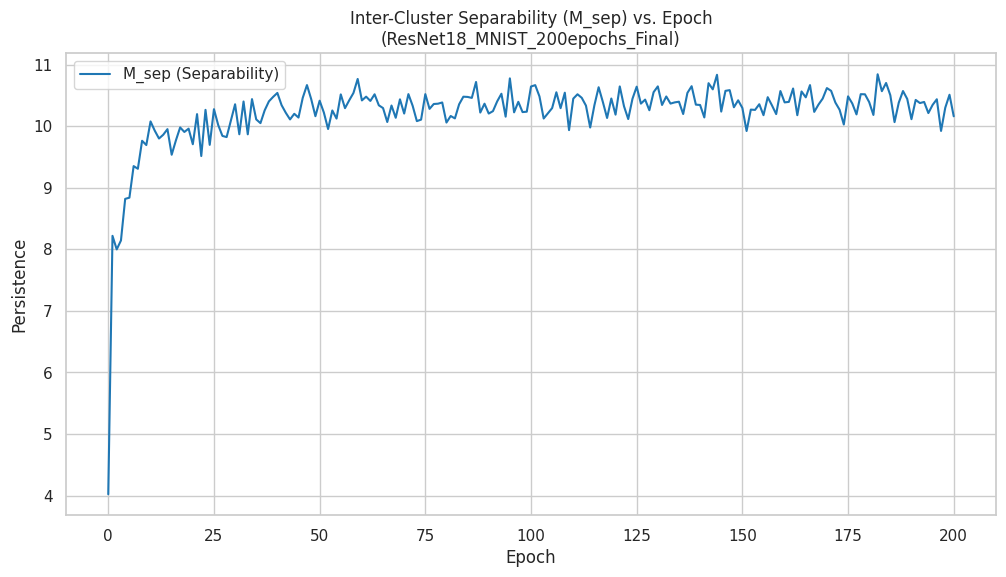

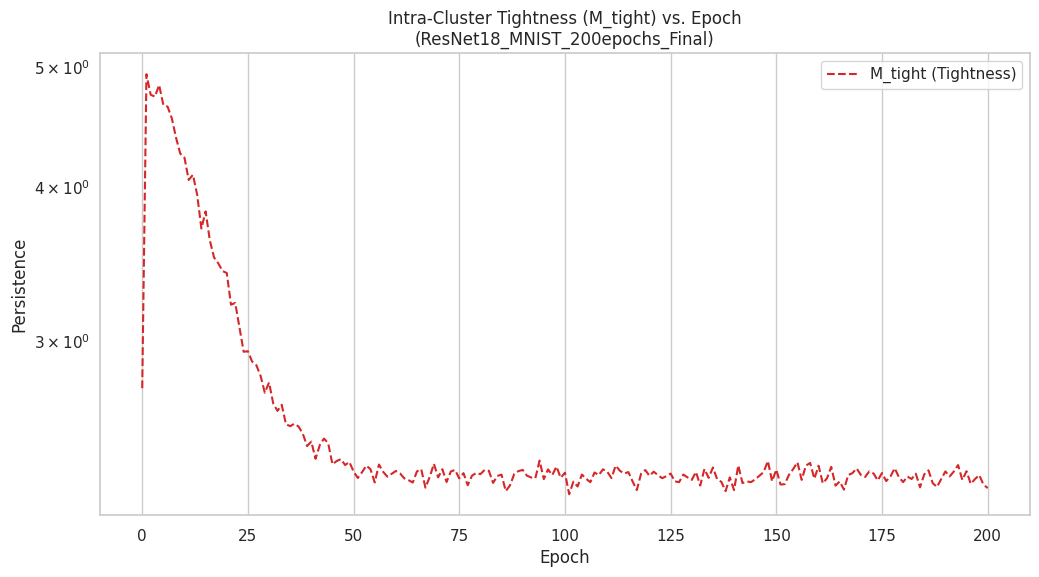

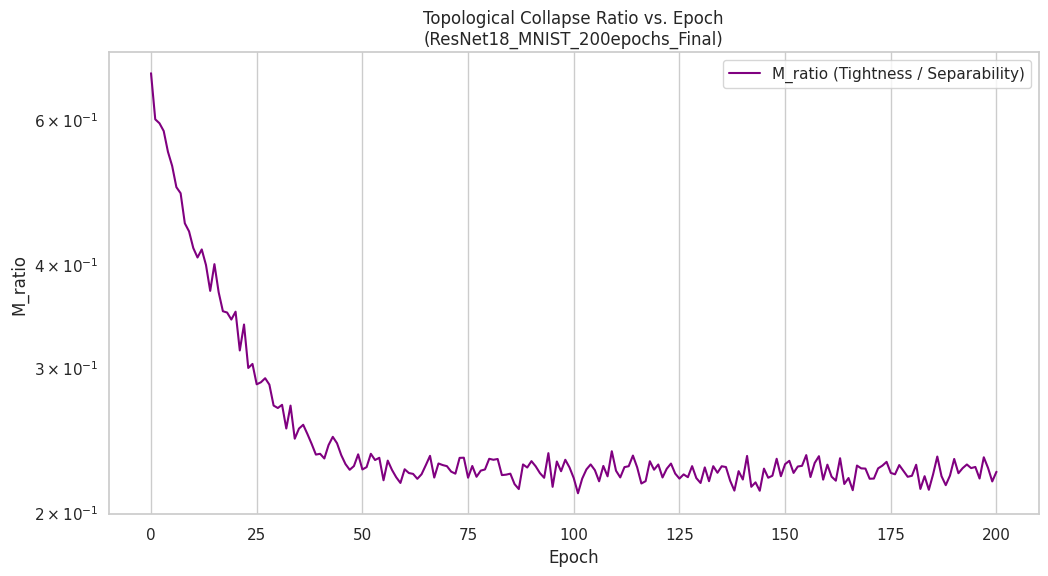

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional plot style
sns.set_theme(style="whitegrid")

# %% [code]
# --- Dataset Information Registry ---
DATASET_INFO = {
    "CIFAR100": {"num_classes": 100},
    "STL10": {"num_classes": 10},
    "MNIST": {"num_classes": 10},
    "FashionMNIST": {"num_classes": 10},
    "Aircraft": {"num_classes": 100},
    "Food101": {"num_classes": 101},
    "Food101_Downsampled": {"num_classes": 101}
}

# %% [markdown]
# ## 1. Configuration
#
# **--> IMPORTANT:** Change this path to point to the `..._params.json` file of your desired experiment.

# %% [code]
# --- CONFIGURATION ---
#EXPERIMENT_CONFIG_PATH = 'snapshots/cifar100/resnet18/run_parameters/ResNet18_CIFAR100_200epochs_Final_params.json'
#EXPERIMENT_CONFIG_PATH = 'snapshots/cifar100/densenet121/run_parameters/DenseNet121_CIFAR100_200epochs_Final_params.json'
EXPERIMENT_CONFIG_PATH = 'snapshots/mnist/resnet18/run_parameters/ResNet18_MNIST_200epochs_Final_params.json'
#EXPERIMENT_CONFIG_PATH = 'snapshots/mnist/densenet121/run_parameters/DenseNet121_MNIST_200epochs_Final_params.json'
# ---------------------

# %% [code]
# --- Load Experiment Configuration ---
try:
    with open(EXPERIMENT_CONFIG_PATH, 'r') as f:
        config = json.load(f)
    print("Successfully loaded experiment configuration:")
    print(json.dumps(config, indent=2))

    SNAPSHOT_DIR = config['SNAPSHOT_DIR']
    EXPERIMENT_NAME = config['EXPERIMENT_NAME']
    DATASET_NAME = config['DATASET_NAME']

    if config['CLASSES_TO_USE'] == 'all':
        if DATASET_NAME in DATASET_INFO:
            NUM_CLASSES = DATASET_INFO[DATASET_NAME]['num_classes']
            print(f"Looked up number of classes for '{DATASET_NAME}': {NUM_CLASSES}")
        else:
            NUM_CLASSES = -1
    else:
        NUM_CLASSES = len(config['CLASSES_TO_USE'])

except FileNotFoundError:
    print(f"ERROR: Configuration file not found at '{EXPERIMENT_CONFIG_PATH}'")
    config = None

# %% [markdown]
# ## 2. Data Loading

# %% [code]
def load_history_log(snapshot_dir, experiment_name):
    """Loads the full history log for an experiment."""
    history_path = os.path.join(snapshot_dir, f"{experiment_name}_full_history.json")
    if not os.path.exists(history_path):
        history_path += ".checkpoint"
        if not os.path.exists(history_path):
            print(f"Warning: History file not found.")
            return None

    df = pd.read_json(history_path)
    return df.set_index('epoch')

def load_persistence_diagram(snapshot_dir, experiment_name, epoch):
    """Loads the single, unified persistence diagram for a specific epoch."""
    # This now looks for the correct filename format from your updated training script
    diagram_path = os.path.join(snapshot_dir, "diagrams", f"{experiment_name}_epoch_{epoch}_diagrams.pkl")
    if not os.path.exists(diagram_path):
        return None

    with open(diagram_path, 'rb') as f:
        diagram = pickle.load(f)
    return diagram

# %% [code]
if config:
    history_df = load_history_log(SNAPSHOT_DIR, EXPERIMENT_NAME)
    if history_df is not None:
        print("Successfully loaded history log.")
        display(history_df.head())

# %% [markdown]
# ## 3. Topological Measure Calculation
#
# This section now processes the single, unified persistence diagram for each epoch, which directly aligns with the methodology in your paper.

# %% [code]
def calculate_topological_measures_from_unified_diagram(diagram, num_classes):
    """
    Calculates the suite of topological measures from a pre-filtered list of
    finite H0 persistence pairs (birth, death).
    """
    if not diagram:
        return {'m_sep': np.nan, 'm_tight': np.nan, 'm_eq': np.nan, 'm_ratio': np.nan}

    # --- CORRECTED SECTION ---
    # The diagram is now a simple list of (birth, death) tuples,
    # as it has been pre-filtered in metrics.py.
    persistence_values = []
    for birth, death in diagram:
        persistence_values.append(death - birth)
    # --- END OF CORRECTION ---

    if not persistence_values:
        return {'m_sep': 0, 'm_tight': 0, 'm_eq': 0, 'm_ratio': np.nan}

    persistence_values.sort(reverse=True)

    m = len(persistence_values)
    k = num_classes

    if m < k - 1:
        return {
            'm_sep': np.nan, 'm_tight': np.mean(persistence_values) if m > 0 else 0,
            'm_eq': np.nan, 'm_ratio': np.nan
        }

    top_k_minus_1_persistence = persistence_values[:k-1]
    m_sep = np.mean(top_k_minus_1_persistence)
    remaining_persistence = persistence_values[k-1:]
    m_tight = np.mean(remaining_persistence) if len(remaining_persistence) > 0 else 0
    m_eq = np.std(top_k_minus_1_persistence) if len(top_k_minus_1_persistence) > 0 else 0
    m_ratio = m_tight / m_sep if m_sep > 1e-9 else np.inf

    return {'m_sep': m_sep, 'm_tight': m_tight, 'm_eq': m_eq, 'm_ratio': m_ratio}



# --- Process all epochs to calculate topological measures ---
if config and history_df is not None and NUM_CLASSES > 0:
    topo_measures_history = []
    diagrams = []

    for epoch in history_df.index:
        diagram = load_persistence_diagram(SNAPSHOT_DIR, EXPERIMENT_NAME, epoch)
        diagrams.append(diagram)
        if diagram:
            measures = calculate_topological_measures_from_unified_diagram(diagram, NUM_CLASSES)
            measures['epoch'] = epoch
            topo_measures_history.append(measures)

    if topo_measures_history:
        topo_df = pd.DataFrame(topo_measures_history).set_index('epoch')
        history_df = history_df.join(topo_df)
        print("Topological measures calculated and merged successfully.")
        display(history_df[['m_sep', 'm_tight', 'm_ratio']].head())
    else:
        print("WARNING: No persistence diagrams were found. Skipping topological analysis.")

# %% [markdown]
# ## 4. Analysis and Visualization
#
# The plotting cells remain the same and will now display the results from the new, more rigorous calculations.

# %% [code]
if config and history_df is not None:
    # --- Plot 1: Accuracy ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['train_acc'], label='Training Accuracy')
    plt.plot(history_df.index, history_df['test_acc'], label='Validation Accuracy', linestyle='--')
    plt.title(f'Accuracy vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 101)
    plt.show()

    # --- Plot 2: Loss ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['train_loss'], label='Training Loss')
    plt.plot(history_df.index, history_df['test_loss'], label='Validation Loss', linestyle='--')
    plt.title(f'Loss vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

# %% [markdown]
# ### 4.1. Neural Collapse Metrics Visualization

# %% [code]
if config and history_df is not None:
    # --- Plot 3: NC1 ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['nc1_pinv'], label='NC1 (pinv)')
    plt.title(f'NC1 (Variability Collapse) vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('NC1 Value')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

    # --- Plot 4: NC2 ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['nc2_etf_err'], label='NC2 (ETF Error)', color='green')
    plt.title(f'NC2 (Equiangularity) vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('NC2 Value (ETF Error)')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

# %% [markdown]
# ### 4.2. Proposed Topological Measures Visualization

# %% [code]
if config and history_df is not None and 'm_sep' in history_df.columns:

    # --- Plot 5a: Inter-Cluster Separability ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['m_sep'], label='M_sep (Separability)', color='tab:blue')
    plt.title(f'Inter-Cluster Separability (M_sep) vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('Persistence')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot 5b: Intra-Cluster Tightness ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['m_tight'], label='M_tight (Tightness)', color='tab:red', linestyle='--')
    plt.title(f'Intra-Cluster Tightness (M_tight) vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('Persistence')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

    # --- Plot 6: Topological Collapse Ratio ---
    plt.figure(figsize=(12, 6))
    plt.plot(history_df.index, history_df['m_ratio'], label='M_ratio (Tightness / Separability)', color='purple')
    plt.title(f'Topological Collapse Ratio vs. Epoch\n({EXPERIMENT_NAME})')
    plt.xlabel('Epoch')
    plt.ylabel('M_ratio')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

Successfully loaded experiment configuration:
{
  "EXPERIMENT_NAME": "ResNet18_CIFAR100_200epochs_Final",
  "SNAPSHOT_DIR": "snapshots/cifar100/resnet18",
  "ARCHITECTURE_NAME": "resnet18",
  "DATASET_NAME": "CIFAR100",
  "CLASSES_TO_USE": "all",
  "N_EPOCHS": 200,
  "BATCH_SIZE": 128,
  "TRAIN_LR": 0.0679,
  "SCHEDULER_PATIENCE": 5,
  "SCHEDULER_FACTOR": 0.5,
  "PD_SAMPLE_SIZE": 2048,
  "PD_MAX_EDGE_LENGTH": 100.0,
  "NC_SAMPLE_SIZE": 10000,
  "SAVE_MODEL_HISTORY": true
}
Looked up number of classes for 'CIFAR100': 100
Successfully loaded history log.
Topological measures calculated and merged successfully.


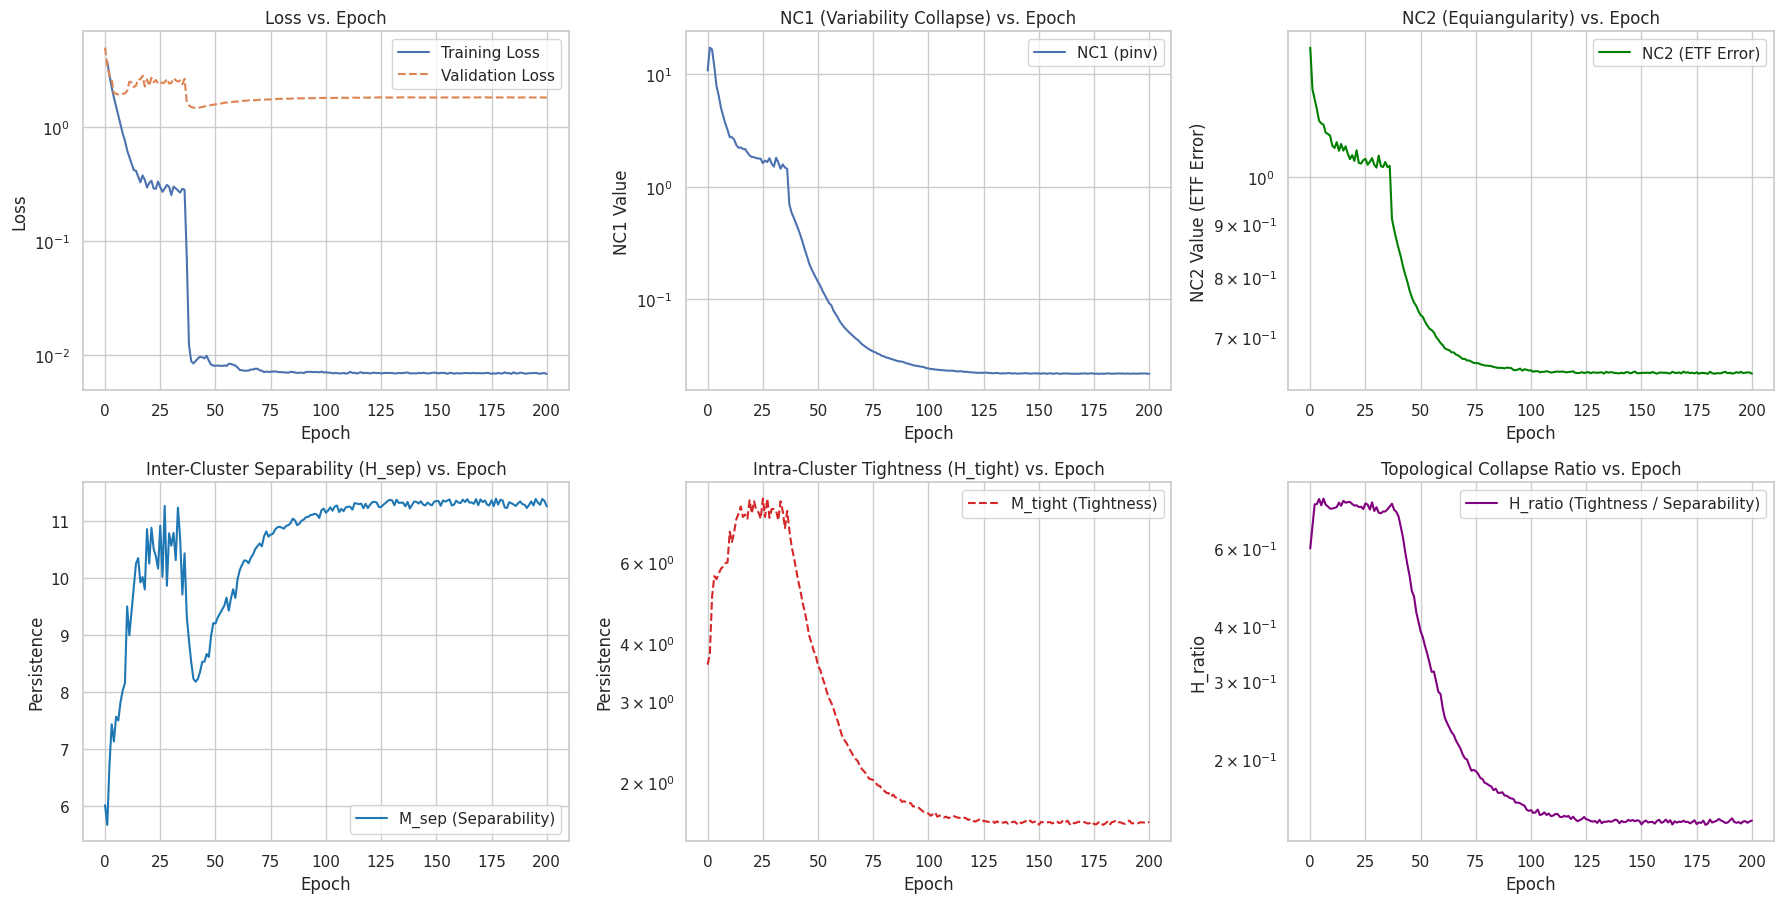

In [2]:
import json
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional plot style
sns.set_theme(style="whitegrid")

# --- Dataset Information Registry ---
DATASET_INFO = {
    "CIFAR100": {"num_classes": 100},
    "STL10": {"num_classes": 10},
    "MNIST": {"num_classes": 10},
    "FashionMNIST": {"num_classes": 10},
    "Aircraft": {"num_classes": 100},
    "Food101": {"num_classes": 101},
    "Food101_Downsampled": {"num_classes": 101}
}

# --- CONFIGURATION ---
# This path should be the same as the one used in your notebook
#EXPERIMENT_CONFIG_PATH = 'snapshots/mnist/resnet18/run_parameters/ResNet18_MNIST_200epochs_Final_params.json'
EXPERIMENT_CONFIG_PATH = 'snapshots/cifar100/resnet18/run_parameters/ResNet18_CIFAR100_200epochs_Final_params.json'
# ---------------------

# --- Load Experiment Configuration ---
try:
    with open(EXPERIMENT_CONFIG_PATH, 'r') as f:
        config = json.load(f)
    print("Successfully loaded experiment configuration:")
    print(json.dumps(config, indent=2))

    SNAPSHOT_DIR = config['SNAPSHOT_DIR']
    EXPERIMENT_NAME = config['EXPERIMENT_NAME']
    DATASET_NAME = config['DATASET_NAME']

    if config['CLASSES_TO_USE'] == 'all':
        if DATASET_NAME in DATASET_INFO:
            NUM_CLASSES = DATASET_INFO[DATASET_NAME]['num_classes']
            print(f"Looked up number of classes for '{DATASET_NAME}': {NUM_CLASSES}")
        else:
            NUM_CLASSES = -1
    else:
        NUM_CLASSES = len(config['CLASSES_TO_USE'])

except FileNotFoundError:
    print(f"ERROR: Configuration file not found at '{EXPERIMENT_CONFIG_PATH}'")
    config = None

# --- Data Loading Functions ---
def load_history_log(snapshot_dir, experiment_name):
    """Loads the full history log for an experiment."""
    history_path = os.path.join(snapshot_dir, f"{experiment_name}_full_history.json")
    if not os.path.exists(history_path):
        history_path += ".checkpoint"
        if not os.path.exists(history_path):
            print(f"Warning: History file not found.")
            return None

    df = pd.read_json(history_path)
    return df.set_index('epoch')

def load_persistence_diagram(snapshot_dir, experiment_name, epoch):
    """Loads the single, unified persistence diagram for a specific epoch."""
    diagram_path = os.path.join(snapshot_dir, "diagrams", f"{experiment_name}_epoch_{epoch}_diagrams.pkl")
    if not os.path.exists(diagram_path):
        return None

    with open(diagram_path, 'rb') as f:
        diagram = pickle.load(f)
    return diagram

# --- Load History Log ---
if config:
    history_df = load_history_log(SNAPSHOT_DIR, EXPERIMENT_NAME)
    if history_df is not None:
        print("Successfully loaded history log.")

# --- Topological Measure Calculation Functions ---
def calculate_topological_measures_from_unified_diagram(diagram, num_classes):
    """
    Calculates the suite of topological measures from a pre-filtered list of
    finite H0 persistence pairs (birth, death).
    """
    if not diagram:
        return {'m_sep': np.nan, 'm_tight': np.nan, 'm_eq': np.nan, 'm_ratio': np.nan}

    persistence_values = [death - birth for birth, death in diagram]

    if not persistence_values:
        return {'m_sep': 0, 'm_tight': 0, 'm_eq': 0, 'm_ratio': np.nan}

    persistence_values.sort(reverse=True)

    m = len(persistence_values)
    k = num_classes

    if m < k - 1:
        return {
            'm_sep': np.nan, 'm_tight': np.mean(persistence_values) if m > 0 else 0,
            'm_eq': np.nan, 'm_ratio': np.nan
        }

    top_k_minus_1_persistence = persistence_values[:k-1]
    m_sep = np.mean(top_k_minus_1_persistence)
    remaining_persistence = persistence_values[k-1:]
    m_tight = np.mean(remaining_persistence) if len(remaining_persistence) > 0 else 0
    m_eq = np.std(top_k_minus_1_persistence) if len(top_k_minus_1_persistence) > 0 else 0
    m_ratio = m_tight / m_sep if m_sep > 1e-9 else np.inf

    return {'m_sep': m_sep, 'm_tight': m_tight, 'm_eq': m_eq, 'm_ratio': m_ratio}

# --- Process all epochs to calculate topological measures ---
if config and history_df is not None and NUM_CLASSES > 0:
    topo_measures_history = []
    for epoch in history_df.index:
        diagram = load_persistence_diagram(SNAPSHOT_DIR, EXPERIMENT_NAME, epoch)
        if diagram:
            measures = calculate_topological_measures_from_unified_diagram(diagram, NUM_CLASSES)
            measures['epoch'] = epoch
            topo_measures_history.append(measures)

    if topo_measures_history:
        topo_df = pd.DataFrame(topo_measures_history).set_index('epoch')
        history_df = history_df.join(topo_df)
        print("Topological measures calculated and merged successfully.")
    else:
        print("WARNING: No persistence diagrams were found. Skipping topological analysis.")

# --- Publication-ready visualization cell ---
if config and history_df is not None and 'm_sep' in history_df.columns:
    # Create a 2x3 subplot figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # --- Row 1: Loss and Neural Collapse Metrics ---

    # Plot 1: Loss vs. Epoch
    axes[0, 0].plot(history_df.index, history_df['train_loss'], label='Training Loss')
    axes[0, 0].plot(history_df.index, history_df['test_loss'], label='Validation Loss', linestyle='--')
    axes[0, 0].set_title('Loss vs. Epoch')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    axes[0, 0].set_yscale('log')

    # Plot 2: NC1 vs. Epoch
    axes[0, 1].plot(history_df.index, history_df['nc1_pinv'], label='NC1 (pinv)')
    axes[0, 1].set_title('NC1 (Variability Collapse) vs. Epoch')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('NC1 Value')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    axes[0, 1].set_yscale('log')

    # Plot 3: NC2 vs. Epoch
    axes[0, 2].plot(history_df.index, history_df['nc2_etf_err'], label='NC2 (ETF Error)', color='green')
    axes[0, 2].set_title('NC2 (Equiangularity) vs. Epoch')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('NC2 Value (ETF Error)')
    axes[0, 2].legend()
    axes[0, 2].grid(True)
    axes[0, 2].set_yscale('log')

    # --- Row 2: Topological Measures ---

    # Plot 4: Inter-Cluster Separability (M_sep) vs. Epoch
    axes[1, 0].plot(history_df.index, history_df['m_sep'], label='M_sep (Separability)', color='tab:blue')
    axes[1, 0].set_title('Inter-Cluster Separability (H_sep) vs. Epoch')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Persistence')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Plot 5: Intra-Cluster Tightness (M_tight) vs. Epoch
    axes[1, 1].plot(history_df.index, history_df['m_tight'], label='M_tight (Tightness)', color='tab:red', linestyle='--')
    axes[1, 1].set_title('Intra-Cluster Tightness (H_tight) vs. Epoch')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Persistence')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    axes[1, 1].set_yscale('log')

    # Plot 6: Topological Collapse Ratio (M_ratio) vs. Epoch
    axes[1, 2].plot(history_df.index, history_df['m_ratio'], label='H_ratio (Tightness / Separability)', color='purple')
    axes[1, 2].set_title('Topological Collapse Ratio vs. Epoch')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].set_ylabel('H_ratio')
    axes[1, 2].legend()
    axes[1, 2].grid(True)
    axes[1, 2].set_yscale('log')

    # Adjust layout to prevent titles and labels from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('publication_visualization.pdf', bbox_inches='tight')

    plt.show()
else:
    print("Required data for visualization is not available. Please ensure the notebook has been run successfully.")

In [4]:
import json
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- General Setup ---
sns.set_theme(style="whitegrid")
DATASET_INFO = {
    "CIFAR100": {"num_classes": 100},
    "STL10": {"num_classes": 10},
    "MNIST": {"num_classes": 10},
    "FashionMNIST": {"num_classes": 10},
    "Aircraft": {"num_classes": 100},
    "Food101": {"num_classes": 101},
}
# --- Create a directory for the output plots ---
PLOTS_DIR = 'publication_plots'
os.makedirs(PLOTS_DIR, exist_ok=True)


# --- List of all experiment config files ---
experiment_paths = [
    'snapshots/cifar100/resnet18/run_parameters/ResNet18_CIFAR100_200epochs_Final_params.json',
    'snapshots/cifar100/densenet121/run_parameters/DenseNet121_CIFAR100_200epochs_Final_params.json',
    'snapshots/mnist/resnet18/run_parameters/ResNet18_MNIST_200epochs_Final_params.json',
    'snapshots/mnist/densenet121/run_parameters/DenseNet121_MNIST_200epochs_Final_params.json',
    'snapshots/fashionmnist/resnet18/run_parameters/ResNet18_FashionMNIST_200epochs_Final_params.json',
    'snapshots/fashionmnist/densenet121/run_parameters/DenseNet121_FashionMNIST_200epochs_Final_params.json',
    'snapshots/stl10/resnet18/run_parameters/ResNet18_STL10_200epochs_Final_params.json',
    'snapshots/stl10/densenet121/run_parameters/DenseNet121_STL10_200epochs_Final_params.json',
]

# --- Helper Functions ---
def load_history_log(snapshot_dir, experiment_name):
    history_path = os.path.join(snapshot_dir, f"{experiment_name}_full_history.json")
    if not os.path.exists(history_path):
        history_path += ".checkpoint"
        if not os.path.exists(history_path): return None
    df = pd.read_json(history_path).set_index('epoch')
    return df

def load_persistence_diagram(snapshot_dir, experiment_name, epoch):
    diagram_path = os.path.join(snapshot_dir, "diagrams", f"{experiment_name}_epoch_{epoch}_diagrams.pkl")
    if not os.path.exists(diagram_path): return None
    with open(diagram_path, 'rb') as f:
        return pickle.load(f)

def calculate_topological_measures(diagram, num_classes):
    if not diagram: return {'h_sep': np.nan, 'h_tight': np.nan, 'h_ratio': np.nan}
    persistence_values = [d - b for b, d in diagram]
    if not persistence_values: return {'h_sep': 0, 'h_tight': 0, 'h_ratio': np.nan}
    persistence_values.sort(reverse=True)
    m = len(persistence_values)
    k = num_classes
    if m < k - 1: return {'h_sep': np.nan, 'h_tight': np.mean(persistence_values) if m > 0 else 0, 'h_ratio': np.nan}
    top_k = persistence_values[:k-1]
    h_sep = np.mean(top_k)
    rem_p = persistence_values[k-1:]
    h_tight = np.mean(rem_p) if len(rem_p) > 0 else 0
    h_ratio = h_tight / h_sep if h_sep > 1e-9 else np.inf
    return {'h_sep': h_sep, 'h_tight': h_tight, 'h_ratio': h_ratio}

# --- Plotting Function (MODIFIED FOR PUBLICATION) ---
def create_and_save_plot(history_df, experiment_name):
    if 'h_sep' not in history_df.columns:
        print(f"Skipping plot for {experiment_name} due to missing topological data.")
        return

    # --- Readability: Define font sizes ---
    SUBPLOT_TITLE_FONTSIZE = 14
    LABEL_FONTSIZE = 12
    TICK_FONTSIZE = 10
    LEGEND_FONTSIZE = 10

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    # --- Main title (suptitle) is removed as requested ---

    # --- COLUMN 1: Loss and Topological Ratio ---
    ax = axes[0, 0]
    ax.plot(history_df.index, history_df['train_loss'], label='Training Loss')
    ax.plot(history_df.index, history_df['test_loss'], label='Validation Loss', linestyle='--')
    ax.set_title('Loss vs. Epoch', fontsize=SUBPLOT_TITLE_FONTSIZE)
    ax.set_xlabel('Epoch', fontsize=LABEL_FONTSIZE); ax.set_ylabel('Loss', fontsize=LABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE); ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    ax = axes[1, 0]
    ax.plot(history_df.index, history_df['h_ratio'], label=r'$H_{ratio}$', color='purple')
    ax.set_title('Topological Collapse Ratio ($H_{ratio}$)', fontsize=SUBPLOT_TITLE_FONTSIZE)
    ax.set_xlabel('Epoch', fontsize=LABEL_FONTSIZE); ax.set_ylabel('Ratio', fontsize=LABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE); ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    # --- COLUMN 2: NC1 and Intra-Cluster Tightness ---
    ax = axes[0, 1]
    ax.plot(history_df.index, history_df['nc1_pinv'], label='NC1 (pinv)')
    ax.set_title('NC1 (Variability Collapse)', fontsize=SUBPLOT_TITLE_FONTSIZE)
    ax.set_xlabel('Epoch', fontsize=LABEL_FONTSIZE); ax.set_ylabel('NC1 Value', fontsize=LABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE); ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    ax = axes[1, 1]
    ax.plot(history_df.index, history_df['h_tight'], label=r'$H_{tight}$', color='tab:red', linestyle='--')
    ax.set_title(r'Intra-Cluster Tightness ($H_{tight}$)', fontsize=SUBPLOT_TITLE_FONTSIZE)
    ax.set_xlabel('Epoch', fontsize=LABEL_FONTSIZE); ax.set_ylabel('Persistence', fontsize=LABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE); ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    # --- COLUMN 3: NC2 and Inter-Cluster Separability ---
    ax = axes[0, 2]
    ax.plot(history_df.index, history_df['nc2_etf_err'], label='NC2 (ETF Error)', color='green')
    ax.set_title('NC2 (Equiangularity)', fontsize=SUBPLOT_TITLE_FONTSIZE)
    ax.set_xlabel('Epoch', fontsize=LABEL_FONTSIZE); ax.set_ylabel('NC2 Value', fontsize=LABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE); ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    ax = axes[1, 2]
    ax.plot(history_df.index, history_df['h_sep'], label=r'$H_{sep}$', color='tab:blue')
    ax.set_title(r'Inter-Cluster Separability ($H_{sep}$)', fontsize=SUBPLOT_TITLE_FONTSIZE)
    ax.set_xlabel('Epoch', fontsize=LABEL_FONTSIZE); ax.set_ylabel('Persistence', fontsize=LABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE); ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    # --- General Axis settings ---
    for ax in fig.get_axes():
        ax.set_xlim(left=1)

    plt.tight_layout()

    # --- Save the figure to a PDF file ---
    save_path = os.path.join(PLOTS_DIR, f"{experiment_name}_metrics_evolution.pdf")
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig) # Close the figure to free memory
    print(f"Saved plot to: {save_path}")

# --- Main Loop ---
for path in experiment_paths:
    print("-" * 50)
    print(f"Processing: {path}")
    try:
        with open(path, 'r') as f:
            config = json.load(f)

        SNAPSHOT_DIR = config['SNAPSHOT_DIR']
        EXPERIMENT_NAME = config['EXPERIMENT_NAME']
        DATASET_NAME = config['DATASET_NAME']
        NUM_CLASSES = DATASET_INFO.get(DATASET_NAME, {}).get('num_classes', -1)

        history_df = load_history_log(SNAPSHOT_DIR, EXPERIMENT_NAME)
        if history_df is None:
            print(f"Could not load history for {EXPERIMENT_NAME}. Skipping.")
            continue

        topo_measures_history = []
        for epoch in history_df.index:
            diagram = load_persistence_diagram(SNAPSHOT_DIR, EXPERIMENT_NAME, epoch)
            if diagram:
                measures = calculate_topological_measures(diagram, NUM_CLASSES)
                measures['epoch'] = epoch
                topo_measures_history.append(measures)

        if topo_measures_history:
            topo_df = pd.DataFrame(topo_measures_history).set_index('epoch')
            history_df = history_df.join(topo_df)

        create_and_save_plot(history_df, EXPERIMENT_NAME)

    except FileNotFoundError:
        print(f"Config file not found: {path}. Skipping.")
    except Exception as e:
        print(f"An error occurred while processing {path}: {e}")

print("-" * 50)
print("All experiments processed.")

--------------------------------------------------
Processing: snapshots/cifar100/resnet18/run_parameters/ResNet18_CIFAR100_200epochs_Final_params.json
Saved plot to: publication_plots/ResNet18_CIFAR100_200epochs_Final_metrics_evolution.pdf
--------------------------------------------------
Processing: snapshots/cifar100/densenet121/run_parameters/DenseNet121_CIFAR100_200epochs_Final_params.json
Saved plot to: publication_plots/DenseNet121_CIFAR100_200epochs_Final_metrics_evolution.pdf
--------------------------------------------------
Processing: snapshots/mnist/resnet18/run_parameters/ResNet18_MNIST_200epochs_Final_params.json
Saved plot to: publication_plots/ResNet18_MNIST_200epochs_Final_metrics_evolution.pdf
--------------------------------------------------
Processing: snapshots/mnist/densenet121/run_parameters/DenseNet121_MNIST_200epochs_Final_params.json
Saved plot to: publication_plots/DenseNet121_MNIST_200epochs_Final_metrics_evolution.pdf
------------------------------------